In [205]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt

In [206]:
syn_data=pd.read_csv('C:/Users/SHUBHAM/Desktop/synthetic_data.csv')  #reading csv file

syn_frame=pd.DataFrame(syn_data)  #creating a dataframe...


In [207]:
Y=syn_frame['Outcome']              # defining features and target values
X=syn_frame.drop('Outcome',axis=1)

#Splitting data into training and test dataset
X_Train,X_test,Y_Train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

#scaling input parameters`
scaler = StandardScaler()
X_Train = scaler.fit_transform(X_Train)
X_test = scaler.transform(X_test)


In [208]:
#function to generate a polynomia matrix
def Poly_mat(X,degree):
    sample,feature = X.shape
    X_poly = np.ones((sample,1))
    
    for j in range(1,degree+1):
        for i in range(feature):
            X_poly = np.hstack((X_poly,(X[:,i]**j)[:,np.newaxis]))   #inserting elements (column vise) depending on power (1,x,x^2...)
    return X_poly

In [209]:
#function to calculate weight using lasso regression
def Lasso(x,y,lr,lamda,itr):
    sample,features = x.shape
    weights = np.zeros(features)
    cost = np.zeros(itr)
    for i in range(itr):        #applying gradient descent to regression model..
        y_pred = np.dot(x,weights)
        
        grad = (2/sample)*np.dot(x.T,y_pred - y) + lamda/sample
        weights -= lr*grad
        
        cost[i] += np.mean((y_pred - y)**2) + (lamda/sample)*np.sum(weights)   #calculating cost function
    return weights,cost

In [210]:
degree = 2   #initializing degree of polynomial...

X_poly_train = Poly_mat(X_Train,degree)
X_poly_test = Poly_mat(X_test,degree)

In [211]:
l_rate = 0.001     #learning rate
iteration = 1000   # no. of iterations
lamda = 26         # regularization rate

weight,cost = Lasso(X_poly_train,Y_Train,l_rate,lamda,iteration)

In [212]:
y_pred = np.dot(X_poly_test,weight)

r2_scr = r2_score(Y_test,(y_pred))        #calculating r2_score
print('The r2_score obtained is :',round(r2_scr * 100 ,3),'%')

mse = mean_squared_error(Y_test,y_pred)

print("mean squared error : ",mse)


The r2_score obtained is : 19.903 %
mean squared error :  0.18670691660469513


Text(0, 0.5, 'Cost Function')

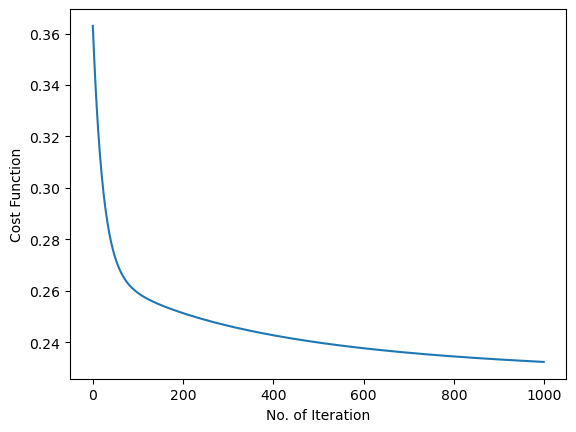

In [213]:
plt.plot(cost)
plt.xlabel("No. of Iteration")
plt.ylabel("Cost Function")